#### Problem Statement: Detect Credit Card Fraud
Data Set: https://www.kaggle.com/mlg-ulb/creditcardfraud

You can use: Python Notebook or KNIME

we are looking to cover end to end ML life cycles.

1. Exploratory Data Analysis
2. Data Quality/Imputation etc
3. Handle data unbalance issue.
4. Develop Classification model using Random Forest (you can use Gradient Boosting or any other implementation)
5. Validation mechanism (you can use cross validation, AUC, confusion matrix ect).
6. Persist model

#### Fields 

- Time: Number of seconds elapsed between this transaction and the first transaction in the dataset  

- V1-V28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

- Amount: Transaction amount

- Class: 1 for fraudulent transactions, 0 otherwise


## EDA

In [1]:
# imports & data load
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/raw/creditcard.csv")

In [2]:
# descriptive main features
## amounts often low, more often not fraud

data[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [3]:
# descriptive pca features
## std dev decreases as V* increases

data.drop(['Time','Amount','Class'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,1.768627e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


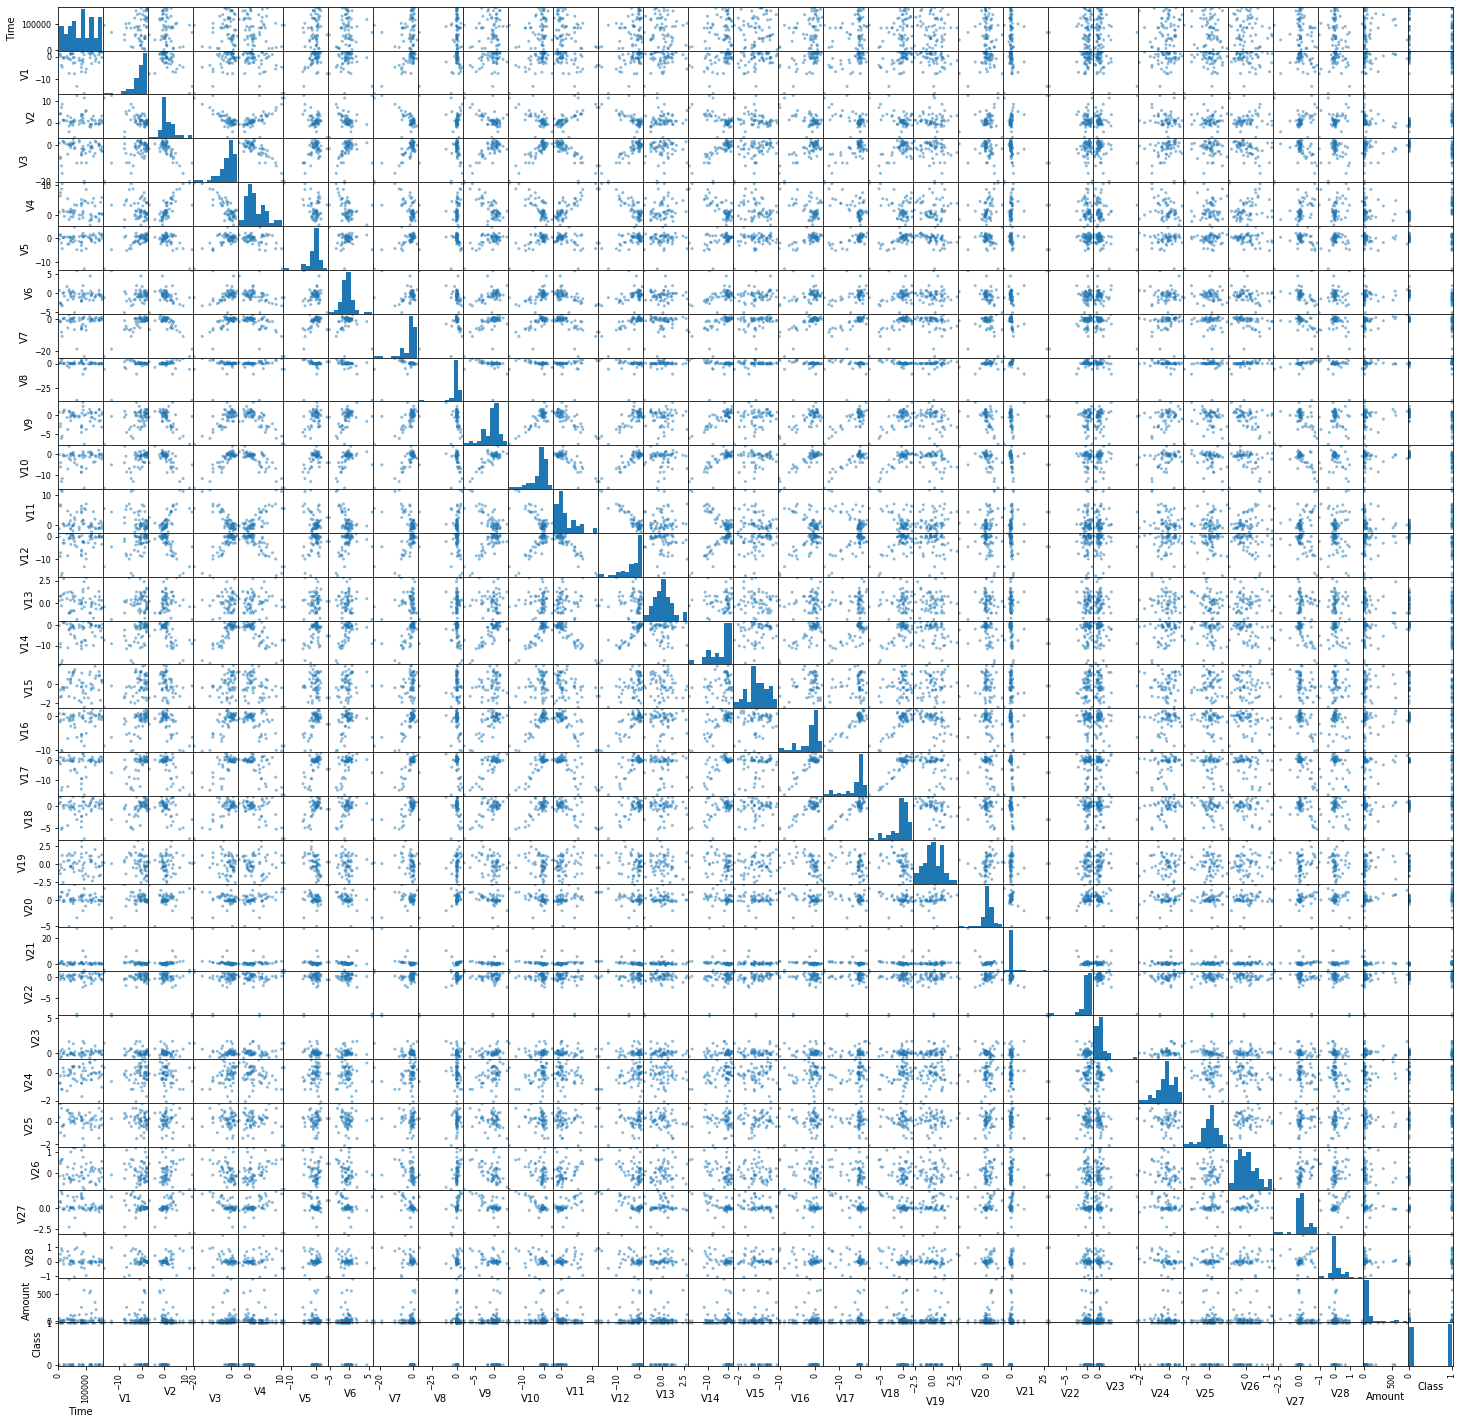

In [4]:
# scatter matrix to get a sense of relationships

scatter = pd.concat([data[data['Class']==0].sample(frac=.0001),data[data['Class']==1].sample(frac=.06)]) # grid plot balanced data
fig = pd.plotting.scatter_matrix(scatter,figsize=(25,25))
plt.show()

## Data Quality
Findings summary:
- No nulls within dataset

In [5]:
# null values
## no nulls

data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Class Balance
Findings summary:
- Recall is increased with under and oversampling

In [6]:
# imports & data load

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

df = data.drop('Time', axis=1)

In [7]:
# Creating training and testing sets

## Separate input features and target
y = df['Class']
x = df.drop('Class', axis=1)

## setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

# Over and undersample adjustment
smote_enn = SMOTEENN(random_state=0)
x_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

## Modelling & HP Tuning

In [ ]:
model = GradientBoostingClassifier()
params = {
    'learning_rate':[.5,1,2],
    'n_estimators':[20,100,150],
    'max_depth':[3,5,8]
}
clf = GridSearchCV(model,params,['recall','precision'],refit='recall')
clf.fit(x_resampled, y_resampled)

C:\Users\amcca\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=['recall', 'precision'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Validation

In [13]:
# confusion matrix
## looks like under and oversampling increases recall... undersampling slightly more than oversampling
model_cf = confusion_matrix(y_test,model.predict(x_test))

model_positives = confusion_matrix(y_test,model.predict(x_test))[1]

print(f'Model:\n{model_cf}\nrecall: {model_positives[1]/model_positives.sum()}')

Model:
[[70519   551]
 [   16   116]]
recall: 0.8787878787878788
